Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading data...
Found 1782 files.
Training samples: 1425, Validation samples: 357


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_8 (Conv2DTranspose) │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_8 (UpSampling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_9 (Conv2DTranspose) │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_9 (UpSampling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 128, 128, 1)         │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,217 (723.50 KB)

 Trainable params: 185,217 (723.50 KB)

 Non-trainable params: 0 (0.00 B)

Training autoencoder...
Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.1612 - loss: 0.0384 - val_accuracy: 0.1517 - val_loss: 0.0044
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.1603 - loss: 0.0034 - val_accuracy: 0.1518 - val_loss: 0.0065
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.1556 - loss: 0.0029 - val_accuracy: 0.1518 - val_loss: 0.0021
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.1670 - loss: 0.0019 - val_accuracy: 0.1518 - val_loss: 0.0025
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.1694 - loss: 0.0017 - val_accuracy: 0.1518 - val_loss: 0.0015
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.1537 - loss: 0.0014 - val_accuracy: 0.1518 - val_loss: 0.0015
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.1608 - loss: 0.0014 - val_accuracy: 0.1518 - val_loss: 0.0013
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.1672 - loss: 0.0011 - 

Model saved successfully!


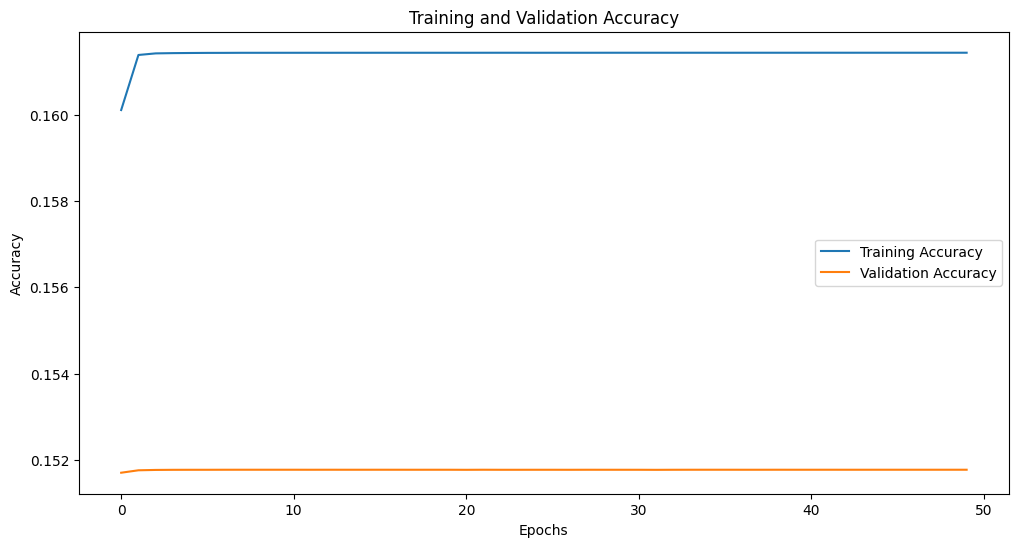

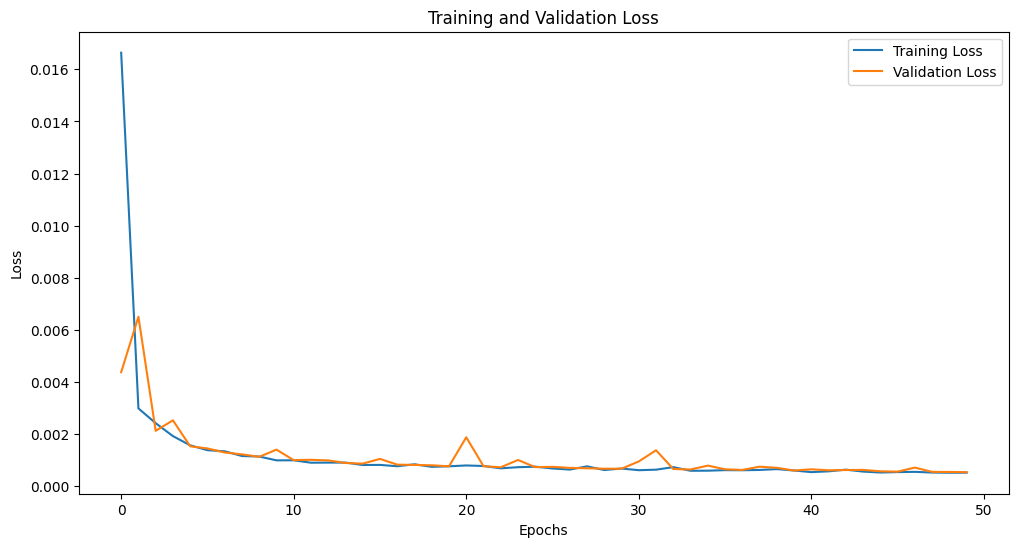

Calculating threshold...
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 637ms/step
Calculated Threshold: 0.02407563105225563
Testing the model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Reconstruction Loss: 0.021199867129325867
Prediction: Valid Waters' view X-ray


In [22]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Constants
IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_CHANNELS = 1  # Grayscale images
BATCH_SIZE = 16
DATASET_PATH = "/content/drive/MyDrive/sinusities/waters_view_dataset"

# Function to preprocess images
def preprocess_image(image_path):
    """
    Preprocess a single image for prediction.
    """
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH), color_mode='grayscale')
    img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to create datasets
def load_data():
    """
    Load data from directory and split into training and validation sets.
    """
    dataset = image_dataset_from_directory(
        DATASET_PATH,
        labels=None,  # No labels as this is unsupervised
        batch_size=BATCH_SIZE,
        image_size=(IMG_HEIGHT, IMG_WIDTH),
        color_mode="grayscale"
    )
    dataset = dataset.map(lambda x: x / 255.0)  # Normalize pixel values
    image_batches = list(dataset.as_numpy_iterator())
    images = np.concatenate(image_batches, axis=0)  # Combine batches into a single array

    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)
    return train_images, val_images

# Autoencoder model definition
def build_autoencoder():
    inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Bottleneck
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

    # Decoder
    x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    outputs = Conv2D(IMG_CHANNELS, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(inputs, outputs)
    autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])  # Mean Squared Error
    return autoencoder

# Function to train the autoencoder
def train_autoencoder(autoencoder, train_data, val_data, epochs=50):
    """
    Train the autoencoder on training data and validate on validation data.
    """
    history = autoencoder.fit(
        train_data, train_data,
        validation_data=(val_data, val_data),
        epochs=epochs,
        batch_size=BATCH_SIZE
    )
    return history

# Function to calculate threshold
def calculate_threshold(autoencoder, val_data):
    """
    Calculate reconstruction loss threshold using validation data.
    """
    reconstructed = autoencoder.predict(val_data)
    loss = np.mean(np.abs(val_data - reconstructed), axis=(1, 2, 3))
    mean_loss = np.mean(loss)
    std_loss = np.std(loss)
    threshold = mean_loss + 2 * std_loss  # Threshold is mean + 2*std deviation
    print(f"Calculated Threshold: {threshold}")
    return threshold

# Function to predict a single image
def predict_image(autoencoder, image_path, threshold):
    """
    Predict whether an image is valid or invalid based on reconstruction loss.
    """
    img_array = preprocess_image(image_path)
    reconstructed = autoencoder.predict(img_array)
    loss = np.mean(np.abs(img_array - reconstructed))  # Compute reconstruction loss
    print(f"Reconstruction Loss: {loss}")
    if loss < threshold:
        return "Valid Waters' view X-ray"
    else:
        return "Invalid X-ray or not an X-ray"

# Main function
def main():
    # Load and preprocess data
    print("Loading data...")
    train_data, val_data = load_data()
    print(f"Training samples: {train_data.shape[0]}, Validation samples: {val_data.shape[0]}")

    # Build autoencoder
    autoencoder = build_autoencoder()
    autoencoder.summary()

    # Train autoencoder
    print("Training autoencoder...")
    history = train_autoencoder(autoencoder, train_data, val_data, epochs=50)

    # Save the trained model to disk
    autoencoder.save("/content/drive/MyDrive/sinusities/waters_view_autoencoder_optimized.h5")
    print("Model saved successfully!")

    # Plot Accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot Loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Calculate threshold
    print("Calculating threshold...")
    threshold = calculate_threshold(autoencoder, val_data)

    # Test the model
    print("Testing the model...")
    test_image_path = "/content/drive/MyDrive/sinusities/test_waters_view/s.jpg"  # Replace with actual test image path
    result = predict_image(autoencoder, test_image_path, threshold)
    print(f"Prediction: {result}")

if __name__ == "__main__":
    main()
